# Regression
## Analysis of Data
8 input features and 2 columns(‘Y1’,’Y2’) to be predicted. Each column contains numerical values.
## Preprocessing Steps
I have checked for duplicate and null values but haven’t found any.  
All numerical values so
no encoding required.
## Information about code
I have used an object-oriented approach by creating classes. To create a particular model, I am creating an object for that
respective class and then applying fit function on it to improve the model.
## Code Approach:
Linear Regression closed form: w = pseudoinverse(X)*y  
Linear Regression gradient descend: w_new = w - lr(learning rate)*gradient
## Test and train errors

| Algorithm    | Features    | Prediction  | Test/Train         | MSE           | MAE        | ARE          |
| :---:       | :---:       | :---:       | :---:        |         :---: | :---:       |    :----:   |
| Univariate Linear Regression (closed form)| X1     |  Y1   | Train | 61.68250201 | 6.21776911 | 38.134117738
| Univariate Linear Regression (closed form)| X1     |  Y1   | Test |62.08100744 | 5.90770589|25.805453718|
| Multivariate Linear Regression (closed form)| X1-X8     |  Y1   | Train|8.84171268|2.12887585|10.392177616776|
| Multivariate Linear Regression (closed form)| X1-X8     |  Y1   | Test|12.38385656|2.87898823|14.85463477721|
| Multivariate Linear Regression (closed form)| X1-X8     |  Y2   | Train|10.58086224|2.26041685|9.35429032241|
| Multivariate Linear Regression (closed form)| X1-X8     |  Y2   | Test|11.85829312|2.70507949|11.75757983311|
| Univariate Linear Regression (gradient descend)| X1     |  Y1   | Train|59.10982235|5.90869755|34.20721452726583|
| Univariate Linear Regression (gradient descend)| X1     |  Y1   | Test|70.32569263|6.15254756|25.068907576532|
| Multivariate Linear Regression (gradient descend)| X1-X8     |  Y1   | Train|21.03246453|3.53266606|19.04176185612271|
| Multivariate Linear Regression (gradient descend)| X1-X8     |  Y1   | Test|27.28774608|3.92897355|19.041761856122|
| Multivariate Linear Regression (gradient descend)| X1-X8     |  Y2   | Train|23.27756416|3.62355348|16.330451019673|
| Multivariate Linear Regression (gradient descend)| X1-X8     |  Y2   | Test | 26.56407074|3.81189368|15.612731124169|


# Preprocessing

Imports

In [680]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

Loading data

In [681]:
main_df = pd.read_excel("./ENB2012_data.xlsx")

Data description

In [682]:
main_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Checking for null/empty values

In [683]:
main_df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [684]:
(main_df == "?").sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Checking for duplicates

In [685]:
main_df.duplicated().sum()

0

In [686]:
main_df.nunique()

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    587
Y2    636
dtype: int64

# Common Functions

Mean squared error function

In [687]:
def MSE(y,ypred):
  return sum((y - ypred)**2)/ypred.shape[0]

Mean absolute error function

In [688]:
def MAE(y,ypred):
  return sum(abs(y-ypred))/ypred.shape[0]

Absolute relative error function

In [689]:
def ARE(y,ypred):
    return ((100/y.size)*np.sum((np.abs(y-ypred)/(np.abs(y) + 0.01))))   

Function to split training and test data

In [690]:
def train_test_split(X,y,train_size):
    a = int(X.shape[0]*train_size)
    b = X.shape[0]-a
    return X[:a],X[b:],y[:a],y[b:]

In [691]:
def Normalize(X):
    return (X - np.mean(X,axis=0))/np.std(X,axis=0)

# Linear Regression

Linear regression class 

In [692]:
from array import array
from operator import matmul


class LinReg:
    w = np.identity(1)
    cost = np.array([])
    def fit(self,x,y):
        global w
        a,b = x.shape
        x0 = np.ones((a,1))
        X = np.hstack((x0,x))
        xTx = matmul(X.transpose(),X)
        pinv = matmul(np.linalg.inv(xTx),X.transpose()) #pseudo-inverse
        w = matmul(pinv,y)
        return w
    
    def hypo(self,w,x):
        return matmul(w.transpose(),x)

    def gd_fit(self,w_ini,x,y,lr,itrs):
        global w,cost
        cost = np.array([])
        w = w_ini
        a,b = x.shape
        x0 = np.ones((a,1))
        X = np.hstack((x0,x))
        for k in range(itrs):
            for i in range(b+1):
                sum = 0
                for j in range(a):
                    sum += (matmul(w_ini.transpose(),X[j]) - y[j])*X[j][i]
                grad = (lr*sum)/a # gradient
                w[i] = w_ini[i] - grad
            cost =   np.append(cost,MSE(y,self.predict(x))) 
            w_ini = w
        return cost; 

    def predict(self,x):
        global w
        a,b = x.shape
        x0 = np.ones((a,1))
        X = np.hstack((x0,x))
        return matmul(w.transpose(),X.transpose()).transpose()

    

# Linear Regression (Univariate)

In [693]:
X = main_df[['X1']].to_numpy().astype(np.float64)
y = main_df[['Y1']].to_numpy().astype(np.float64)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.6)

In [694]:
ulr_model = LinReg()
w = ulr_model.fit(X,y)
print(w)
train_yhat = ulr_model.predict(train_X)
test_yhat = ulr_model.predict(test_X)

[[-23.05301406]
 [ 59.35905261]]


In [695]:
print(MSE(train_y,train_yhat))

[61.68250201]


In [696]:
print(MAE(train_y,train_yhat))

[6.21776911]


In [697]:
print(ARE(train_y,train_yhat))

38.13411773882514


In [698]:
print(MSE(test_y,test_yhat))

[62.08100744]


In [699]:
print(MAE(test_y,test_yhat))

[5.90770589]


In [700]:
print(ARE(test_y,test_yhat))

25.805453718034787


# Linear Regression Multivariate

Predicting 'Y1'

In [701]:
X = main_df[['X1','X2','X3','X4','X5','X6','X7','X8']].to_numpy().astype(np.float64)
y = main_df[['Y1']].to_numpy().astype(np.float64)
X = Normalize(X)
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.6)

mlr_model = LinReg()
cost = mlr_model.fit(train_X,train_y)


train_yhat = mlr_model.predict(train_X)
test_yhat = mlr_model.predict(test_X)

In [702]:
print(MSE(train_y,train_yhat))

[8.84171268]


In [703]:
print(MAE(train_y,train_yhat))

[2.12887585]


In [704]:
print(ARE(train_y,train_yhat))

10.392177616776301


In [705]:
print(MSE(test_y,test_yhat))

[12.38385656]


In [706]:
print(MAE(test_y,test_yhat))

[2.87898823]


In [707]:
print(ARE(test_y,test_yhat))

14.85463477721348


Predicting 'Y2'

In [708]:
X = main_df[['X1','X2','X3','X4','X5','X6','X7','X8']].to_numpy().astype(np.float64)
y = main_df[['Y2']].to_numpy().astype(np.float64)
X = Normalize(X)
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.6)

mlr_model = LinReg()
cost = mlr_model.fit(train_X,train_y)


train_yhat = mlr_model.predict(train_X)
test_yhat = mlr_model.predict(test_X)

In [709]:
print(MSE(train_y,train_yhat))

[10.58086224]


In [710]:
print(MAE(train_y,train_yhat))

[2.26041685]


In [711]:
print(ARE(train_y,train_yhat))

9.354290322412705


In [712]:
print(MSE(test_y,test_yhat))

[11.85829312]


In [713]:
print(MAE(test_y,test_yhat))

[2.70507949]


In [714]:
print(ARE(test_y,test_yhat))

11.757579833118074


# Linear Regression (Gradient descend) - Univariate

In [715]:
X = main_df[['X1']].to_numpy().astype(np.float64)
y = main_df[['Y1']].to_numpy().astype(np.float64)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.6)

ulr_gd_model = LinReg()
cost = ulr_gd_model.gd_fit(np.ones((train_X.shape[1]+1,1)),train_X,train_y,1,1000)

train_yhat = ulr_gd_model.predict(train_X)
test_yhat = ulr_gd_model.predict(test_X)

Plotting cost vs iterations

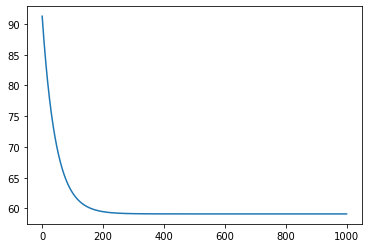

In [716]:
plt.plot(cost)

In [717]:
print(MSE(train_y,train_yhat))

[59.10982235]


In [718]:
print(MAE(train_y,train_yhat))

[5.90869755]


In [719]:
print(ARE(train_y,train_yhat))

34.20721452726583


In [720]:
print(MSE(test_y,test_yhat))

[70.32569263]


In [721]:
print(MAE(test_y,test_yhat))

[6.15254756]


In [722]:
print(ARE(test_y,test_yhat))

25.068907576532233


# Linear Regression (Gradient descend) - Multivariate

Predicting Y1

In [723]:
X = main_df[['X1','X2','X3','X4','X5','X6','X7','X8']].to_numpy().astype(np.float64)
y = main_df[['Y1']].to_numpy().astype(np.float64)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.6)

mlr_gd_model = LinReg()
cost = mlr_gd_model.gd_fit(np.ones((train_X.shape[1]+1,1)),train_X,train_y,0.00001,300)


train_yhat = mlr_gd_model.predict(train_X)
test_yhat = mlr_gd_model.predict(test_X)

graph of cost vs iterations

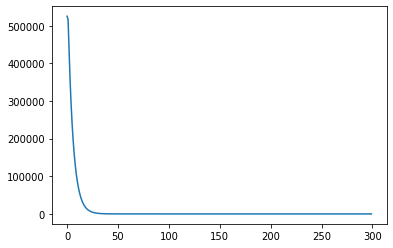

In [724]:
plt.plot(cost)

In [725]:
print(MSE(train_y,train_yhat))

[21.03246453]


In [726]:
print(MAE(train_y,train_yhat))

[3.53266606]


In [727]:
print(ARE(train_y,train_yhat))

19.04176185612271


In [728]:
print(MSE(test_y,test_yhat))

[27.28774608]


In [729]:
print(MAE(test_y,test_yhat))

[3.92897355]


In [730]:
print(ARE(train_y,train_yhat))

19.04176185612271


Predicting 'Y2'

In [731]:
X = main_df[['X1','X2','X3','X4','X5','X6','X7','X8']].to_numpy().astype(np.float64)
y = main_df[['Y2']].to_numpy().astype(np.float64)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.6)

mlr_gd_model = LinReg()
cost = mlr_gd_model.gd_fit(np.ones((train_X.shape[1]+1,1)),train_X,train_y,0.00001,300)


train_yhat = mlr_gd_model.predict(train_X)
test_yhat = mlr_gd_model.predict(test_X)

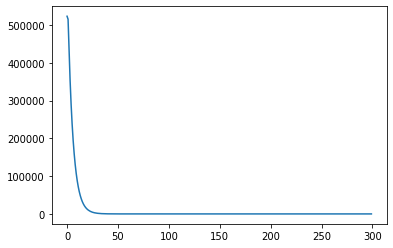

In [732]:
plt.plot(cost)

In [733]:
print(MSE(train_y,train_yhat))

[23.27756416]


In [734]:
print(MAE(train_y,train_yhat))

[3.62355348]


In [735]:
print(ARE(train_y,train_yhat))

16.330451019673554


In [736]:
print(MSE(test_y,test_yhat))

[26.56407074]


In [737]:
print(MAE(test_y,test_yhat))

[3.81189368]


In [738]:
print(ARE(test_y,test_yhat))

15.61273112416903
